<a href="https://colab.research.google.com/github/Eldave93/Seizure-Detection-Tutorials/blob/master/09.%20Convolutional%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. Convolutional Neural Networks

**TODO**
- Write an introduction

In [0]:
!pip install tensorflow-gpu==2.1

     |████████████████████████████████| 421.8MB 18kB/s 
     |████████████████████████████████| 3.8MB 49.4MB/s 
     |████████████████████████████████| 450kB 58.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
#GPU count and name
!nvidia-smi -L
#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-a5ba906d-7d09-4875-d605-ff6ccfa7f7f0)
Wed Feb 26 15:14:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes

In [0]:
from google.colab import drive
import sys
import os

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Copy Locally

Copy your data sets to VM local filesystem to improve training speeds. It means each run is slower BUT training is much faster than if left on google drive<sup>1</sup>

---
1. https://dev.to/kriyeng/8-tips-for-google-colab-notebooks-to-take-advantage-of-their-free-of-charge-12gb-ram-gpu-be4

In [0]:
import os
import gdown

# change the file path to the one that will be on disk
FILT_FILE_PATH = 'TUH_filt.hdf5'
UDWT_FILE_PATH = 'TUH_udwt.hdf5'

if not os.path.exists(FILT_FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=1-NP_r_VxjR7np9n0tswqguTB5Vps0pO5', 
                   './'+FILE_PATH, quiet=False)

if not os.path.exists(UDWT_FILE_PATH):
  gdown.download('https://drive.google.com/uc?id=1-Gt6jFvABjr5yagQUzD83O3xcoT5_wlc', 
                   './'+FILE_PATH, quiet=False)

# 1D CNN

**TODO**
- write introduction

"*In 1D CNN, kernel moves in 1 direction. Input and output data of 1D CNN is 2 dimensional. Mostly used on Time-Series data.*" https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610

## Data Preparation (Filtered Data)

Using a CNN with the filtered data is similar to...

- Alhussein, M., Muhammad, G., Hossain, M. S., & Amin, S. U. (2018). Cognitive IoT-Cloud Integration for Smart Healthcare: Case Study for Epileptic Seizure Detection and Monitoring. Mobile Networks and Applications, 23(6), 1624–1635. https://doi.org/10.1007/s11036-018-1113-0

- Truong, N. D., Nguyen, A. D., Kuhlmann, L., Bonyadi, M. R., Yang, J., Ippolito, S., & Kavehei, O. (2018). Integer convolutional neural network for seizure detection. IEEE Journal on Emerging and Selected Topics in Circuits and Systems, 8(4), 849–857. https://doi.org/10.1109/JETCAS.2018.2842761

- Yuvaraj, R., Thomas, J., Kluge, T., & Dauwels, J. (2019). A deep Learning Scheme for Automatic Seizure Detection from Long-Term Scalp EEG. Conference Record - Asilomar Conference on Signals, Systems and Computers, 2018-Octob, 368–372. https://doi.org/10.1109/ACSSC.2018.8645301

- Zou, L., Liu, X., Jiang, A., & Zhousp, X. (2019). Epileptic Seizure Detection Using Deep Convolutional Network. International Conference on Digital Signal Processing, DSP, 2018-Novem. https://doi.org/10.1109/ICDSP.2018.8631789

**NOTES**
- Zou2019 only let neurons for each EEG channel to be connected (called it a channel-restricted convolution method). This sounds like an Xception style model

In [0]:
import h5py
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tables
from sklearn import preprocessing

TEST_SIZE = 0.1
RANDOM_STATE = 0

def make_data(data_lists, data_type, filepath):
  data_dict = {}
  h5file = tables.open_file(filepath, mode="r+")
  for group_type in data_lists:
    key_list = data_lists[group_type]
    for i, part_id in enumerate(key_list):
      if i == 0:
        data = h5file.get_node('/'+part_id+'/'+data_type)[:]
      else:
        data = np.concatenate([data, h5file.get_node('/'+part_id+'/'+data_type)[:]])
    data_dict[group_type] = data
  return data_dict

def load_and_prep(FILE_PATH):
  f = h5py.File(FILE_PATH, 'r')
  key_list = list(f.keys())

  train_list, test_list = train_test_split(key_list, test_size=TEST_SIZE, 
                                          random_state=RANDOM_STATE)
  train_list, val_list = train_test_split(train_list, test_size=TEST_SIZE, 
                                          random_state=RANDOM_STATE)
  data_lists = {'train': train_list, 
                'test': test_list,
                'val': val_list}

  data_x_dict = make_data(data_lists, 'Data_x', FILE_PATH)
  X_train = data_x_dict['train']
  X_val = data_x_dict['val']
  X_test = data_x_dict['test']

  data_y_dict = make_data(data_lists, 'Data_y', FILE_PATH)
  y_train = data_y_dict['train']
  y_val = data_y_dict['val']
  y_test = data_y_dict['test']

  # lets change the integers so they are ordered
  le = preprocessing.LabelEncoder()
  y_train = le.fit_transform(y_train)
  y_val = le.transform(y_val)
  y_test = le.transform(y_test)

  print(X_train.shape)
  print(X_val.shape)
  print(X_test.shape)

  print(y_train.shape)
  print(y_val.shape)
  print(y_test.shape)

  return X_train, X_val, X_test, y_train, y_val, y_test

X_train_filt, X_val_filt, X_test_filt, y_train_filt, y_val_filt, y_test_filt = load_and_prep(FILT_FILE_PATH)

(16764, 512, 22)
(2421, 512, 22)
(2814, 512, 22)
(16764,)
(2421,)
(2814,)


## Model Input

As you can see above we have a 3 dimensional dataframe:

1. Different windows of data (each with a class label in the y array)
2. Each data point (512 being the length of the window)
3. The different channels

Lets just have a look at one of the windows in one of the channels as an example.

**TODO**
- just plot out an example of a seizure and none seizure timeseries

## Typical Layers

**TODO**
- make a moving image explaining how a 1D CNN kernel moves across the filtered data

Lets start building a basic convolutional model. We start with clearing the session and specifying the model as sequential as we did previously.

We then add two lots of convolutional layers. Typically there are more than one Conv layer next to each other in CNN models.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input
from tensorflow.keras.backend import clear_session

clear_session()
model = Sequential()
# this just tells the model what input shape to expect
model.add(Input(shape=X_train_filt.shape[1:]))
for i in range(2):
  model.add(Conv1D(filters=64,
                  kernel_size=3,
                  padding="same",
                  activation='relu'))

Now we use maxpooling to reduce the outputs from the layer. Max pooling takes the maximum value in a window.

In [0]:
from tensorflow.keras.layers import MaxPooling1D
model.add(MaxPooling1D(pool_size=3, # size of the window
                       strides=2,   # factor to downsample
                       padding='same'))

Now we will add another lot of convolutional layers, but this time increasing the filter size.

In [0]:
for i in range(2):
  model.add(Conv1D(filters=128,
                  kernel_size=3,
                  padding="same",
                  activation='relu'))

Now we will reduce the output of the model so far so we can feed it through dense layers. There are a number of ways to do this:
- `Flatten()` just reshapes the input into 1-D. This results in a lot of inputs to the dense layer. For example it would change a tensor of (samples, 152, 18) to (samples, 152x18).
- `GlobalAveragePooling1D()` applies average pooling on all dimensions apart from the 'channels' (which is typically the last dimension specified) until each dimension is one. For example, it would change a tensor of (samples, 152, 18) to (samples, 1, 18).
- `GlobalMaxPooling1D()` works similar to average pooling exect takes the maximum value instead

In [0]:
from tensorflow.keras.layers import Flatten, GlobalAveragePooling1D, GlobalMaxPooling1D
model.add(Flatten())

Now we will add our dense layers and compile the model. Notice how many outputs (Output Shape) there is from the flatten layer. If we were to actually train this model we would probably need to add more dense layers with increased units.

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model.add(Dense(units=100,
                activation='relu'))

model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           4288      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 512, 64)           12352     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 256, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 256, 128)          24704     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 256, 128)          49280     
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               3

We will put all our parts of the model together now, add our dense layers, and compile the model. However this time we will use a GlobalAveragePooling1D layer, which reduces the number of outputs compared to if we used a flatten layer

In [0]:
# Returns a short sequential model
def create_model(input_shape, flatten=False):
  clear_session()
  model = Sequential()

  # this just tells the model what input shape to expect
  model.add(Input(shape=input_shape[1:]))
  for i in range(2):
    model.add(Conv1D(filters=64,
                    kernel_size=3,
                    padding="same",
                    activation='relu'))
    
  model.add(MaxPooling1D(pool_size=3, # size of the window
                       strides=2,   # factor to downsample
                       padding='same'))
  
  for i in range(2):
    model.add(Conv1D(filters=128,
                    kernel_size=3,
                    padding="same",
                    activation='relu'))
  if flatten:
    model.add(Flatten())
  else:
    model.add(GlobalAveragePooling1D())

  model.add(Dense(units=64,
                  activation='relu'))

  model.add(Dense(units=1,
                  activation='sigmoid'))

  model.compile(optimizer=Adam(0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

  return model

clear_session()
# Create a basic model instance
model = create_model(X_train_filt.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           4288      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 512, 64)           12352     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 256, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 256, 128)          24704     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 256, 128)          49280     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

Lets get our callback functions as we did last notebook...

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

def create_callbacks(best_model_filepath, tensorboard_logs_filepath):

  callback_checkpoint = ModelCheckpoint(filepath=best_model_filepath,
                                        monitor='val_loss',
                                        verbose=0,
                                        save_weights_only=True,
                                        save_best_only=True)
  
  callback_early_stopping = EarlyStopping(monitor='val_loss',
                                          patience=10, 
                                          verbose=1)
  
  callback_tensorboard = TensorBoard(log_dir=tensorboard_logs_filepath,
                                     histogram_freq=0,
                                     write_graph=False)
  
  callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.1,
                                         min_lr=1e-4,
                                         patience=0,
                                         verbose=1)
  
  return [callback_checkpoint, callback_early_stopping,
          callback_tensorboard, callback_reduce_lr]

...and train the model

In [0]:
from sklearn.utils import class_weight

EPOCHS = 20
BATCH_SIZE = 64
best_model_filepath = "CNN1D_Model.ckpt"
tensorboard_logs_filepath = "./CNN1D_logs/"

# calculate the class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(y_train_filt),
                                                  y_train_filt)

history_1D = model.fit(X_train_filt, 
                       y_train_filt,
                       batch_size=BATCH_SIZE, 
                       epochs=EPOCHS,
                       validation_data = (X_val_filt, y_val_filt),
                       callbacks= create_callbacks(best_model_filepath, 
                                                   tensorboard_logs_filepath),
                       class_weight = class_weights,
                       verbose=1)

Train on 16764 samples, validate on 2421 samples
Epoch 1/20
16764/16764 [==============================] - 4s 231us/sample - loss: 0.1140 - accuracy: 0.9772 - AUC: 0.8452 - Recall: 0.5566 - Precision: 0.7687 - val_loss: 0.0980 - val_accuracy: 0.9727 - val_AUC: 0.9726 - val_Recall: 0.7328 - val_Precision: 1.0000
Epoch 2/20
16764/16764 [==============================] - 3s 157us/sample - loss: 0.0464 - accuracy: 0.9880 - AUC: 0.9563 - Recall: 0.7608 - Precision: 0.9017 - val_loss: 0.0689 - val_accuracy: 0.9818 - val_AUC: 0.9767 - val_Recall: 0.8300 - val_Precision: 0.9903
Epoch 3/20
16448/16764 [============================>.] - ETA: 0s - loss: 0.0436 - accuracy: 0.9888 - AUC: 0.9636 - Recall: 0.7704 - Precision: 0.9167
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
16764/16764 [==============================] - 3s 162us/sample - loss: 0.0437 - accuracy: 0.9888 - AUC: 0.9640 - Recall: 0.7687 - Precision: 0.9181 - val_loss: 0.0822 - val_accuracy: 0.9777 -

Lets visualise the training

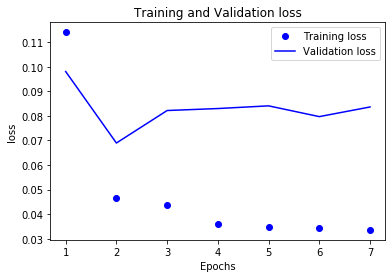

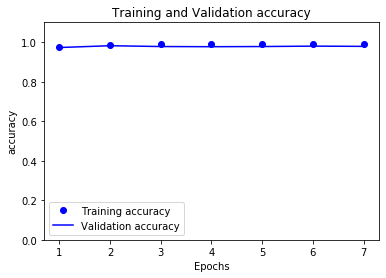

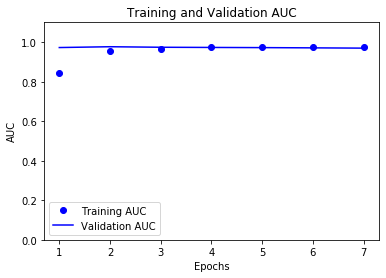

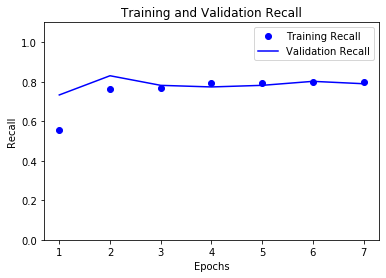

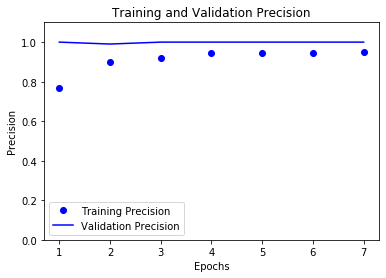

In [0]:
import matplotlib.pyplot as plt

def plot_progress(history_dict):
  for key in list(history_dict.keys())[:5]:
    plt.clf() # Clears the figure
    training_values = history_dict[key] 
    val_values = history_dict['val_'+key]

    epochs = range(1, len(training_values) + 1)

    plt.plot(epochs, training_values, 'bo', label='Training '+key)

    plt.plot(epochs, val_values, 'b', label='Validation '+key)

    if key != 'loss':
      plt.ylim([0.,1.1])

    plt.title('Training and Validation '+key) 
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend()
    plt.show()
    
plot_progress(history_1D.history)

# 2D CNN
Conv2D is generally used on 3D image-like data. The 2D part is a description of how a *Kernel* slides along the data. The kernel itself is actually 3D and outputs 3 dimensional data.

**NOTES**
- [This](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html) is an awesome visualisation of a CNN for numbers

## Data Preparation (UDWT Data)

In [0]:
X_train_udwt, X_val_udwt, X_test_udwt, y_train_udwt, y_val_udwt, y_test_udwt = load_and_prep(UDWT_FILE_PATH)

(16764, 6, 512, 22)
(2421, 6, 512, 22)
(2814, 6, 512, 22)
(16764,)
(2421,)
(2814,)


## Model Input

As you can see above we have a 4 dimensional dataframe:

1. Different windows of data (each with a class label in the y array)
2. The levels of the UDWT
3. Each data point (512 being the length of the window)
4. The different channels

Lets just have a look at one of the windows in one of the channels as an example to refresh what a spectogram looks like

**TODO**
- Do we want to flip the UDWT levels so we dont have to do it here?

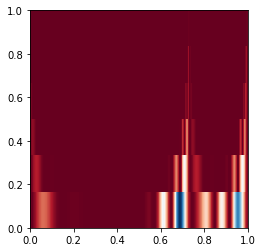

In [0]:
import matplotlib.pyplot as plt
# create the figure
fig = plt.figure()

plt.imshow(X_train_udwt[0,:,:,0][::-1], cmap=plt.cm.RdBu, interpolation='nearest', 
           origin='lower', extent=[0,1,0,1])
plt.show();

This is what the CNN gets per window of data

**TODO**
- 10 is quite high for a ML model, look into the differences some more between standardscaler and minmax scaler for deep learning. SHould I just be using MinMax?

100%|██████████| 22/22 [00:47<00:00,  2.24s/it]


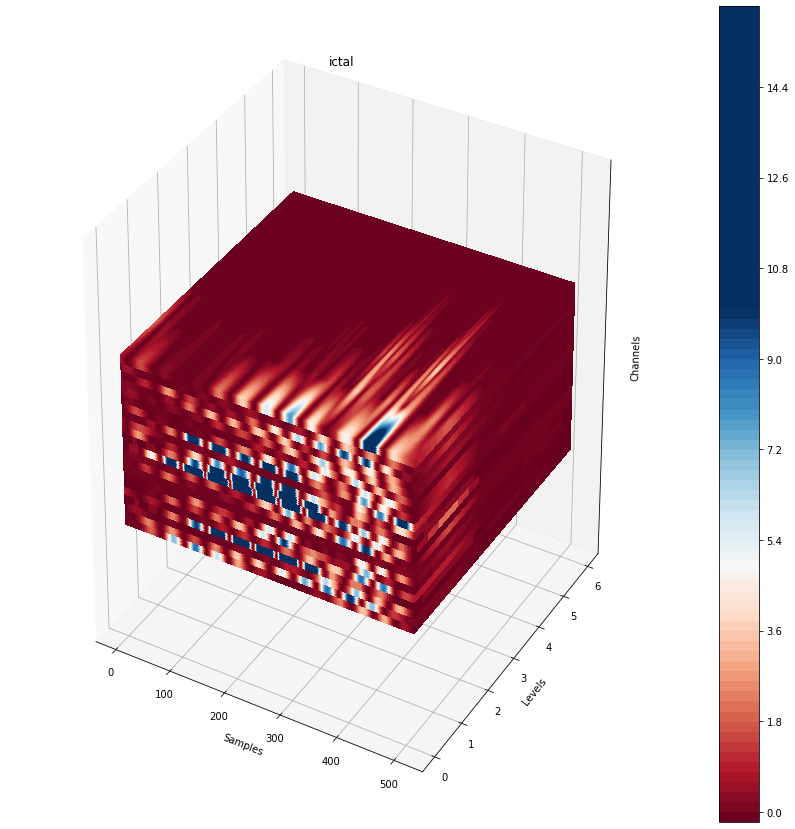

In [0]:
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_3D_spec(plot_data, depth=20, split=False, title=None, 
                 cbar_lims=[None, None], channel_indexes=None):
  
  # create vertices for a rotated mesh (3D rotation matrix)
  X, Y = np.meshgrid(np.linspace(0,plot_data.shape[1],plot_data.shape[1]), 
                     np.linspace(0,plot_data.shape[0],plot_data.shape[0]))
  
  # create the figure
  fig = plt.figure(figsize=(15,15))

  # show the 3D rotated projection
  ax = fig.add_subplot(111, projection='3d')

  added_offset = 0.001
  num_channels = plot_data.shape[-1]

  # set the default starting offset
  if split:
    offset = 0
  else:
    offset = 0.5-((added_offset*depth*num_channels)/2)
  
  if not channel_indexes:
    channel_indexes = range(num_channels)

  for channel_i in tqdm(channel_indexes):
    # this just adds layers of the same channel with a small z offset 
    # to create depth
    for i in range(depth):
      cset = ax.contourf(X, Y, plot_data[:,:,channel_i], 100, zdir='z', 
                         offset=offset, cmap=cm.RdBu, vmin=cbar_lims[0], 
                         vmax=cbar_lims[1])
      offset+=added_offset
    if split:
      offset+= (1 - (added_offset*depth*len(channel_indexes)))/len(channel_indexes)

  ax.set_zlim((0.,1.))
  ax.set_zticks([])
  ax.set_xlabel('Samples')
  ax.set_ylabel('Levels')
  ax.set_zlabel('Channels')

  plt.colorbar(cset)
  if title:
    plt.title(title)

  plt.show()

seiz_idx_udwt = np.where(y_train_udwt == 1)
plot_3D_spec(X_train_udwt[seiz_idx_udwt[0][1],:,:,:][::-1], 
             title = 'ictal', 
             cbar_lims =[-0.2, 10])

If we split them apart we can see clearer that each channel does differ but, when compared to inter-ictal activity, there is more acitivty in the lower frequency bands

100%|██████████| 4/4 [00:08<00:00,  2.12s/it]


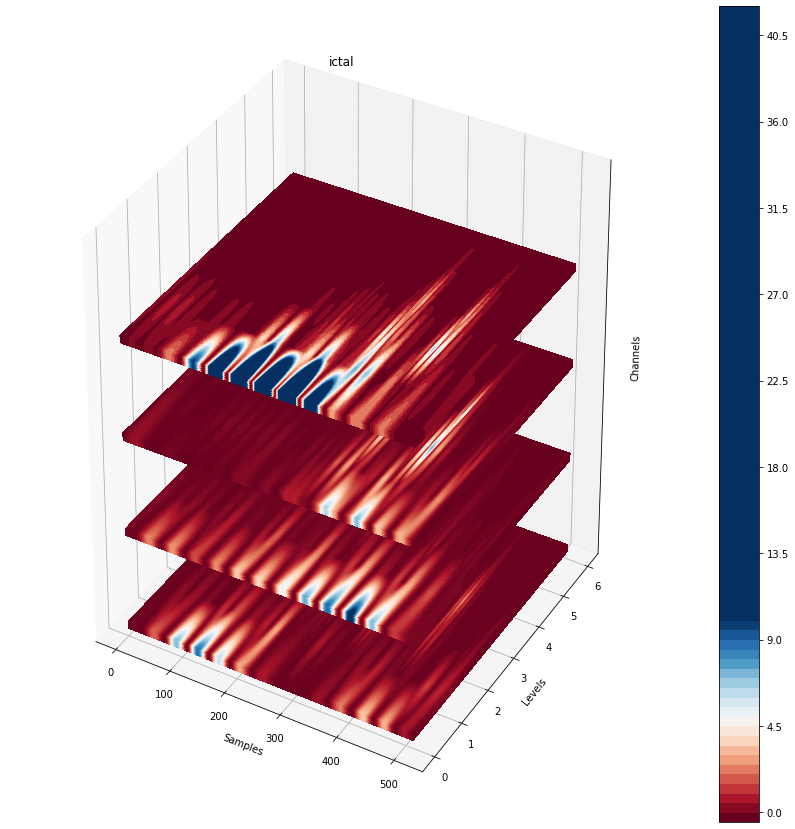

100%|██████████| 4/4 [00:07<00:00,  1.77s/it]


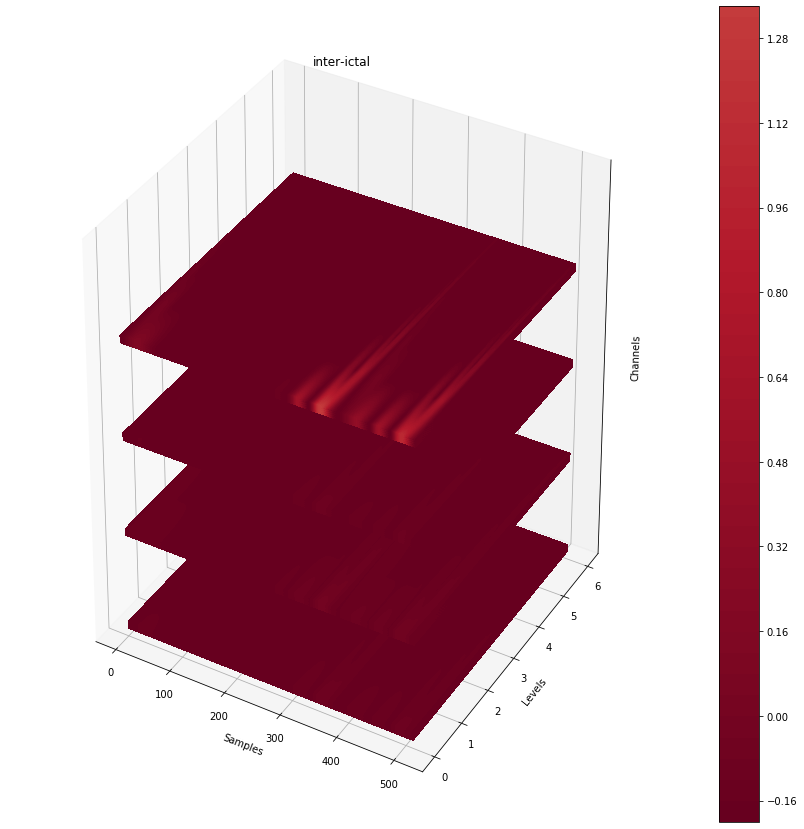

In [0]:
plot_3D_spec(X_train_udwt[seiz_idx_udwt[0][1],:,:,:][::-1], 
             split=True, 
             title = 'ictal', 
             cbar_lims =[-0.2, 10], 
             channel_indexes = [0,1,2,3])

plot_3D_spec(X_train_udwt[0,:,:,:][::-1], 
             split=True, 
             title = 'inter-ictal', 
             cbar_lims =[-0.2, 10], 
             channel_indexes = [0,1,2,3])

## Typical Layers
- `Flatten()` would change a tensor of (samples, 10, 20, 1) to (samples, 10x20x1).
- `GlobalAveragePooling2D()` or `GlobalMaxPooling2D()` would change a tensor of (samples, 10, 20, 2) to (samples, 1, 1, 2).

Notice how this time we use batch normalisation after each layer as well

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Input, Reshape, Conv2D, MaxPooling2D, Flatten, Reshape, GlobalAveragePooling2D, SeparableConv2D, add
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam

# Returns a short sequential model
def create_model(data_shape):
  model = Sequential()

  model.add(Input(shape=data_shape[1:]))

  for i in range (2):
    model.add(Conv2D(filters=64,
                    kernel_size=3,
                    padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=2))

  for i in range (2):
    model.add(Conv2D(filters=128,
                    kernel_size=3,
                    padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=2))

  model.add(GlobalAveragePooling2D())

  model.add(Dense(units=100,
                  activation='relu'))

  model.add(Dense(units=50,
                  activation='relu'))

  model.add(Dense(units=1,
                  activation='sigmoid'))
  
  model.compile(optimizer=Adam(0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])
  
  return model

clear_session()
# Create a basic model instance
model = create_model(X_train_udwt.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 512, 64)        12736     
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 512, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 6, 512, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 512, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 512, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 6, 512, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 256, 64)        0

In [0]:
from sklearn.utils import class_weight

best_model_filepath = "CNN2D_Model.ckpt"
tensorboard_logs_filepath = "./CNN2D_logs/"

history = model.fit(X_train_udwt, 
                    y_train_udwt,
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS,
                    validation_data = (X_val_udwt, y_val_udwt),
                    callbacks= create_callbacks(best_model_filepath, 
                                                tensorboard_logs_filepath),
                    class_weight = class_weights,
                    verbose=1)

Train on 16764 samples, validate on 2421 samples
Epoch 1/20
16764/16764 [==============================] - 11s 672us/sample - loss: 0.0609 - accuracy: 0.9848 - AUC: 0.9506 - Recall: 0.7321 - Precision: 0.8407 - val_loss: 0.1383 - val_accuracy: 0.9665 - val_AUC: 0.9485 - val_Recall: 0.6802 - val_Precision: 0.9882
Epoch 2/20
16704/16764 [============================>.] - ETA: 0s - loss: 0.0422 - accuracy: 0.9882 - AUC: 0.9633 - Recall: 0.7680 - Precision: 0.9023
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
16764/16764 [==============================] - 9s 557us/sample - loss: 0.0421 - accuracy: 0.9882 - AUC: 0.9635 - Recall: 0.7687 - Precision: 0.9026 - val_loss: 0.1807 - val_accuracy: 0.9252 - val_AUC: 0.9561 - val_Recall: 0.2713 - val_Precision: 0.9853
Epoch 3/20
16704/16764 [============================>.] - ETA: 0s - loss: 0.0340 - accuracy: 0.9914 - AUC: 0.9765 - Recall: 0.8067 - Precision: 0.9583
Epoch 00003: ReduceLROnPlateau reducing learning r

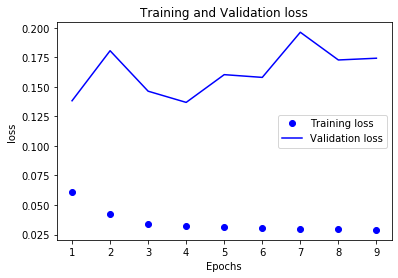

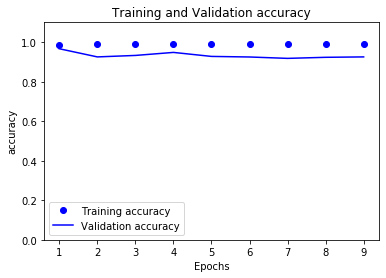

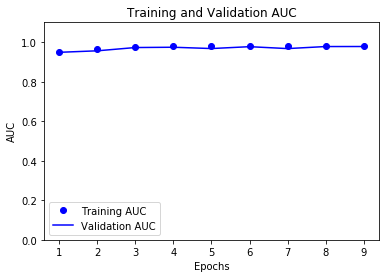

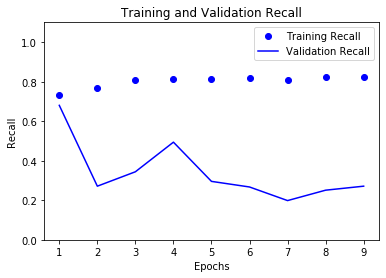

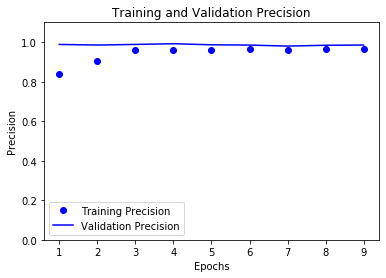

In [0]:
plot_progress(history.history)

# Model Design

There are loads of model designs for CNN. Some just are using the layers we have already discussed in particular orders, whereas others introduce new layers and skip connections.

Most of these models are a lot "deeper" (include more layers) than what we have already made. As such, for the 2D models, we will need to swap round the electrode channels and levels to allow for more maxpooling layers.

In [0]:
X_train_udwt_swapped = np.swapaxes(X_train_udwt, 1, 3)
X_val_udwt_swapped = np.swapaxes(X_val_udwt, 1, 3)

display(X_train_udwt.shape)
display(X_train_udwt_swapped.shape)

(16764, 6, 512, 22)

(16764, 22, 512, 6)

Also, as deep models take longer to train, for demo purposes we are going to use a ballanced batch generator instead of the class weighting. Rather than building our own, we will use the one from the package imballanced learn. However, this only takes 2D data, so we will have to reshape our data first, feed it into the batch generator, and reshape it back before training the model. Luckily this is not too hard to acheive. Lets reshape our data now and keep objects with the shape of the input and what we would like to reshape it back too.

In [0]:
def data_shapes(data):
  target_shape = data.shape[1:]
  data_reshape = np.reshape(data, (data.shape[0], -1))
  input_shape = data_reshape.shape[1:]
  
  return input_shape, target_shape, data_reshape

reshape_input_filt, reshape_target_filt, X_train_filt_reshape = data_shapes(X_train_filt)
reshape_input_filt, reshape_target_filt, X_val_filt_reshape = data_shapes(X_val_filt)

display(reshape_target_filt)
display(reshape_input_filt)
display(X_train_filt_reshape.shape)

(512, 22)

(11264,)

(16764, 11264)

In [0]:
reshape_input_udwt, reshape_target_udwt, X_train_udwt_reshape = data_shapes(X_train_udwt_swapped)
reshape_input_udwt, reshape_target_udwt, X_val_udwt_reshape = data_shapes(X_val_udwt_swapped)

display(reshape_target_udwt)
display(reshape_input_udwt)
display(X_train_udwt_reshape.shape)

(22, 512, 6)

(67584,)

(16764, 67584)

## VGGNet

**TODO**
- Intro to VGGNet

In [0]:
from functools import partial

def VGGNet_conv_layer(model, filter_num, kernel_size, layer_no, DefaultConv, 
                      DefaultMaxPooling):
  if layer_no <= 2:
    conv_layers = 2
  else:
    conv_layers = 4

  for i in range(conv_layers):
    model.add(DefaultConv(filters=filter_num,
                          kernel_size=kernel_size))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
  model.add(DefaultMaxPooling())

  return model

def create_VGGNet_model(input_shape, target_shape, dim='1D', first_filters=64, 
                        kernel=3, conv_layers=5, first_units = 100, dense_layers = 2, 
                        flatten=False):
  clear_session()
  model = Sequential()

  # ------------
  # Input Layers
  # ------------
  model.add(Input(shape=input_shape))
  model.add(Reshape(target_shape))

  # -----------
  # Conv Layers
  # -----------
  if dim == '1D':
    DefaultConv = partial(Conv1D,
                          padding="SAME")
    DefaultMaxPooling = partial(MaxPooling1D,
                                pool_size=2)
    DefaultGlobalAveragePooling = partial(GlobalAveragePooling1D)
  else:
    DefaultConv = partial(Conv2D,
                          padding="SAME")
    DefaultMaxPooling = partial(MaxPooling2D,
                                pool_size=2)
    DefaultGlobalAveragePooling = partial(GlobalAveragePooling2D)

  for layer_no in range(conv_layers):
    # means it starts at 1 rather than 0
    layer_no+=1

    if not layer_no == 5:
      filter_num = first_filters*layer_no
    else:
      filter_num = first_filters*4

    model = VGGNet_conv_layer(model, filter_num, kernel, layer_no, DefaultConv, 
                              DefaultMaxPooling)

  # ------------
  # Dense Layers
  # ------------
  if flatten:
    model.add(Flatten())
  else:
    model.add(DefaultGlobalAveragePooling())

  for layer_no in range(dense_layers):
    layer_no+=1
    model.add(Dense(units=int(first_units/layer_no)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.5))

  # ------------
  # Output Layer
  # ------------
  model.add(Dense(units=1, activation='sigmoid'))
    
  model.compile(optimizer=Adam(0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])
  
  return model

For this example, lets use the filtered data (so 1D CNN) as it will be quicker.

In [0]:
VGGNet1D_model = create_VGGNet_model(reshape_input_filt, reshape_target_filt, dim='1D')
VGGNet1D_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 512, 22)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 512, 64)           4288      
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 64)           256       
_________________________________________________________________
activation (Activation)      (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 512, 64)           12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 64)           256       
_________________________________________________________________
activation_1 (Activation)    (None, 512, 64)           0

In [0]:
from imblearn.keras import balanced_batch_generator

# reduce the batch size as there is less training data than before
BATCH_SIZE = 32

best_model_filepath = "VGGNet1D_Model.ckpt"
tensorboard_logs_filepath = "./VGGNet1D_logs/"

generator_1D, steps_per_epoch_1D = balanced_batch_generator(X_train_filt_reshape, 
                                                            y_train_filt, 
                                                            batch_size=BATCH_SIZE)
# Train
history_VGGNet1D = VGGNet1D_model.fit_generator(generator=generator_1D,
                                                epochs=EPOCHS,
                                                steps_per_epoch=steps_per_epoch_1D,
                                                validation_data = (X_val_filt_reshape, 
                                                                   y_val_filt),
                                                callbacks=create_callbacks(best_model_filepath, 
                                                                           tensorboard_logs_filepath),
                                                verbose=1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should 

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train for 39 steps, validate on 2421 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


39/39 [==============================] - 7s 180ms/step - loss: 0.3700 - accuracy: 0.8454 - AUC: 0.9133 - Recall: 0.7657 - Precision: 0.9103 - val_loss: 0.3061 - val_accuracy: 0.9265 - val_AUC: 0.9251 - val_Recall: 0.3077 - val_Precision: 0.9157
Epoch 2/20
39/39 [==============================] - 2s 50ms/step - loss: 0.2802 - accuracy: 0.9133 - AUC: 0.9429 - Recall: 0.8703 - Precision: 0.9515 - val_loss: 0.2839 - val_accuracy: 0.8992 - val_AUC: 0.9546 - val_Recall: 0.0121 - val_Precision: 1.0000
Epoch 3/20
39/39 [==============================] - 2s 48ms/step - loss: 0.2697 - accuracy: 0.9182 - AUC: 0.9468 - Recall: 0.8824 - Precision: 0.9507 - val_loss: 0.2522 - val_accuracy: 0.8988 - val_AUC: 0.9433 - val_Recall: 0.0081 - val_Precision: 1.0000
Epoch 4/20
39/39 [==============================] - 2s 48ms/step - loss: 0.2333 - accuracy: 0.9272 - AUC: 0.9573 - Recall: 0.8940 - Precision: 0.9580 - val_loss: 0.1772 - val_accuracy: 0.9219 - val_AUC: 0.9622 - val_Recall: 0.2348 - val_Precisio

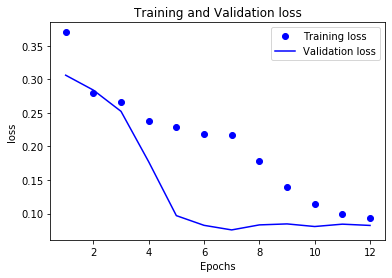

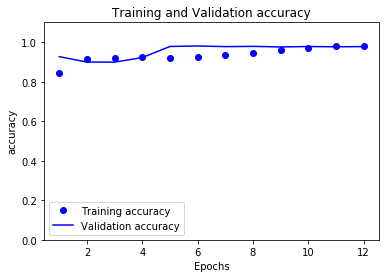

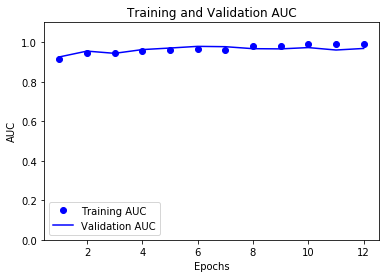

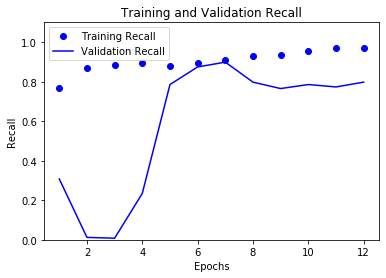

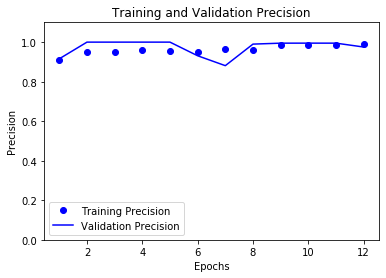

In [0]:
plot_progress(history_VGGNet1D.history)

## ResNet

**NOTES**
- The ResidualUnit code and model setup has been adapted from https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb

**TODO**
- introduce skip connections
- add comments on more lines to explain it better

In [0]:
from tensorflow.keras import activations, models, layers

class ResidualUnit(layers.Layer):
    def __init__(self, filters, kernel, DefaultConv, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = activations.get(activation)
        self.main_layers = [
            DefaultConv(filters, kernel, strides=strides),
            BatchNormalization(),
            self.activation,
            DefaultConv(filters, kernel),
            BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv(filters, kernel_size=1, strides=strides),
                BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)


def get_layers(layers, int_filter):
  filters = []
  
  if layers == 1:
    pass
  elif layers == 2:
    filters = [int_filter]
  elif layers == 3:
    filters = [int_filter, int_filter*2]
  elif layers == 4:
    filters = [int_filter, int_filter*2, int_filter*4]
  elif layers == 5:
    filters = [int_filter, int_filter*2] + [int_filter*4]*2
  elif layers == 6:
    filters = [int_filter] + [int_filter*2]*2 + [int_filter*4]*2
  elif layers == 7:
    filters = [int_filter] + [int_filter*2]*2 + [int_filter*4]*3
  elif layers == 8:
    filters = [int_filter] + [int_filter*2]*3 + [int_filter*4]*3
  elif layers == 9:
    filters = [int_filter]*2 + [int_filter*2]*3 + [int_filter*4]*3
  elif layers == 10:
    filters = [int_filter]*2 + [int_filter*2]*3 + [int_filter*4]*4

  return filters

def create_ResNet_model(input_shape, target_shape, dim='1D', first_filters=64, 
                        kernel=6, conv_layers=10, first_units = 100, dense_layers = 2, 
                        flatten=False):
  clear_session()

  # ------------
  # Input Layers
  # ------------
  inputs = Input(shape=input_shape)
  re = Reshape(target_shape)(inputs)

  # -----------
  # Conv Layers
  # -----------
  if dim == '1D':
    DefaultConv = partial(Conv1D,
                          padding="SAME",
                          use_bias=False)
    DefaultMaxPooling = partial(MaxPooling1D,
                                pool_size=2,
                                padding="SAME")
    DefaultGlobalAveragePooling = partial(GlobalAveragePooling1D)
  else:
    DefaultConv = partial(Conv2D,
                          padding="SAME",
                          use_bias=False)
    DefaultMaxPooling = partial(MaxPooling2D,
                                pool_size=2,
                                padding="SAME")
    DefaultGlobalAveragePooling = partial(GlobalAveragePooling2D)

  
  prev_filters = first_filters
  x = DefaultConv(filters=first_filters, kernel_size=kernel, strides=2)(re)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = DefaultMaxPooling(pool_size=2, padding="SAME")(x)
  
  filters_list = get_layers(conv_layers, first_filters*2)
  for filter_num in filters_list:
    strides = 1 if filter_num == prev_filters else 2
    x = ResidualUnit(filter_num, int(kernel/2), DefaultConv, strides=strides)(x)
    prev_filters = filter_num

  # ------------
  # Dense Layers
  # ------------
  if flatten:
    x = Flatten()(x)
  else:
    x = DefaultGlobalAveragePooling()(x)

  for layer_no in range(dense_layers):
    layer_no+=1
    x = Dense(units=int(first_units/layer_no))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(rate=0.5)(x)

  # ------------
  # Output Layer
  # ------------
  output = Dense(units=1, activation='sigmoid')(x)

  model = models.Model(inputs=[inputs], outputs=[output])
    
  model.compile(optimizer=Adam(0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])
  
  return model

In [0]:
ResNet1D_model = create_ResNet_model(reshape_input_filt, reshape_target_filt, dim='1D')
ResNet1D_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11264)]           0         
_________________________________________________________________
reshape (Reshape)            (None, 512, 22)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 256, 64)           8448      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 64)           256       
_________________________________________________________________
activation (Activation)      (None, 256, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 128, 64)           0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 64, 128)           83456 

In [0]:
best_model_filepath = "ResNet1D_Model.ckpt"
tensorboard_logs_filepath = "./ResNet1D_logs/"

# Train
history_ResNet1D = ResNet1D_model.fit_generator(generator=generator_1D,
                                                epochs=EPOCHS,
                                                steps_per_epoch=steps_per_epoch_1D,
                                                validation_data = (X_val_filt_reshape, 
                                                                   y_val_filt),
                                                callbacks=create_callbacks(best_model_filepath, 
                                                                           tensorboard_logs_filepath),
                                                verbose=1)

  ...
    to  
  ['...']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train for 39 steps, validate on 2421 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


39/39 [==============================] - 8s 216ms/step - loss: 0.3961 - accuracy: 0.8527 - AUC: 0.9139 - Recall: 0.7557 - Precision: 0.9370 - val_loss: 0.6168 - val_accuracy: 0.9323 - val_AUC: 0.9669 - val_Recall: 0.9271 - val_Precision: 0.6107
Epoch 2/20
39/39 [==============================] - 2s 56ms/step - loss: 0.2781 - accuracy: 0.9059 - AUC: 0.9512 - Recall: 0.8725 - Precision: 0.9352 - val_loss: 0.0840 - val_accuracy: 0.9765 - val_AUC: 0.9763 - val_Recall: 0.8462 - val_Precision: 0.9167
Epoch 3/20
39/39 [==============================] - 2s 58ms/step - loss: 0.2301 - accuracy: 0.9288 - AUC: 0.9626 - Recall: 0.8883 - Precision: 0.9661 - val_loss: 0.0716 - val_accuracy: 0.9769 - val_AUC: 0.9753 - val_Recall: 0.8138 - val_Precision: 0.9526
Epoch 4/20
37/39 [===========================>..] - ETA: 0s - loss: 0.1868 - accuracy: 0.9421 - AUC: 0.9742 - Recall: 0.9187 - Precision: 0.9637
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
39/39 [============

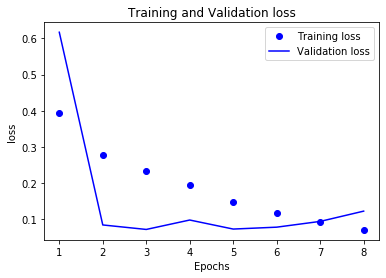

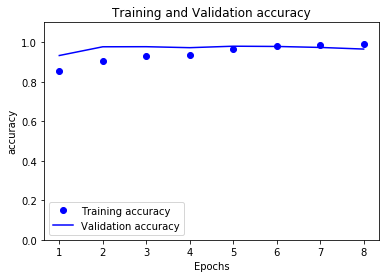

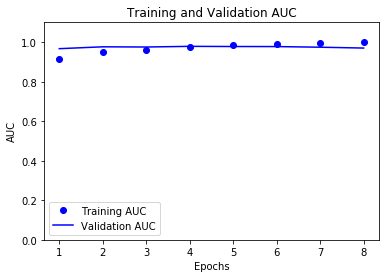

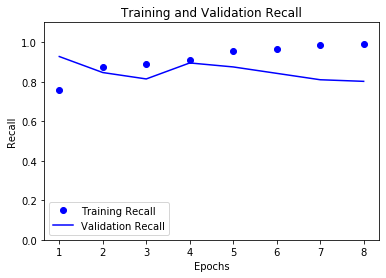

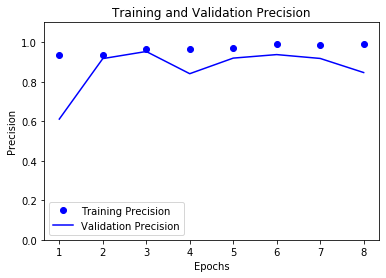

In [0]:
plot_progress(history_ResNet1D.history)

## Xception

Xception has multipule parts, which the author<sup>1</sup> usefully divides into three "flows". Lets look at each flow in turn.

The first flow can actually be broken down into three smaller parts...

---
1. Chollet2017

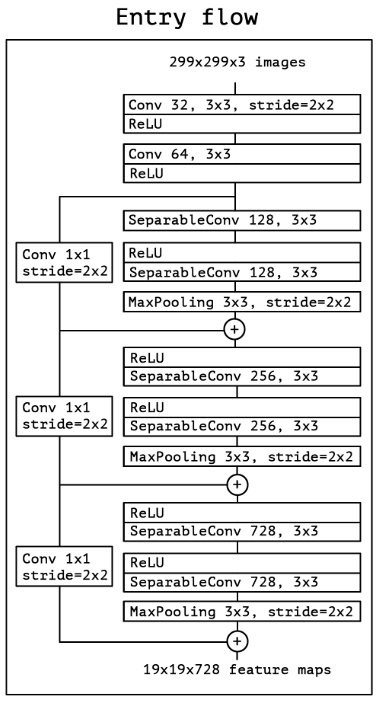

In [0]:
from IPython.display import Image, display
display(Image('/content/drive/My Drive/Tutorial Colab Notebooks/Images/Xception_entry_flow.png'))

**TODO**
- check the first two convolutional layers have valid padding

In [0]:
from tensorflow.keras.backend import clear_session

def entry_flow(x, input_filters, DefaultConv, DefaultSeparableConv, DefaultMaxPooling):

  # -------------
  # Entry Flow: 1
  # -------------
  x = DefaultConv(input_filters, strides=2, padding='valid')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = DefaultConv(int(input_filters*2), padding='valid')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # -------------
  # Entry Flow: 2
  # -------------
  residual = DefaultConv(int(input_filters*4), kernel_size=1, strides=2)(x)
  residual = BatchNormalization()(residual)

  x = DefaultSeparableConv(int(input_filters*4))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = DefaultSeparableConv(int(input_filters*4))(x)
  x = BatchNormalization()(x)

  x = DefaultMaxPooling()(x)
  x = add([x, residual])
  
  # -------------
  # Entry Flow: 3
  # -------------
  for filter_num in [int(input_filters*8),int(input_filters*23)]:
    residual = DefaultConv(filter_num, kernel_size=1, strides=2)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu')(x)
    x = DefaultSeparableConv(filter_num)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = DefaultSeparableConv(filter_num)(x)
    x = BatchNormalization()(x)

    x = DefaultMaxPooling()(x)
    x = add([x, residual])

  return x

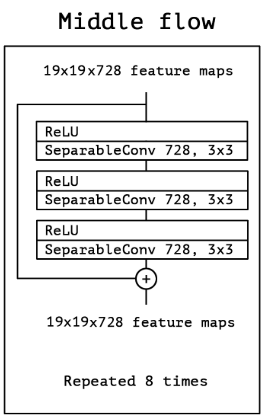

In [0]:
display(Image('/content/drive/My Drive/Tutorial Colab Notebooks/Images/Xception_middle_flow.png'))

In [0]:
def middle_flow(x, input_filters, DefaultSeparableConv):

  residual = x
  filters = int(input_filters*23)

  x = Activation('relu')(x)

  for i in range(2):
    x = DefaultSeparableConv(filters)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

  x = DefaultSeparableConv(filters)(x)
  x = BatchNormalization()(x)

  x = add([x, residual])
  return x

Similar to the beginning, you can split the exit flow into two parts

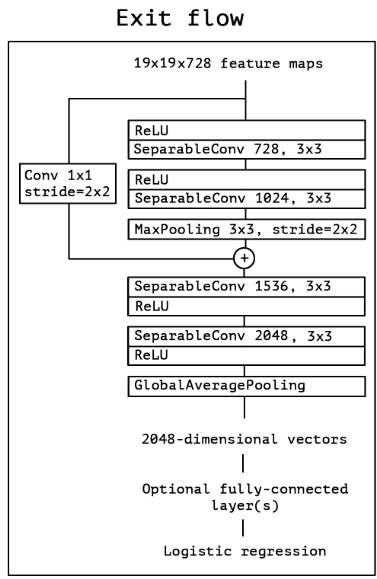

In [0]:
display(Image('/content/drive/My Drive/Tutorial Colab Notebooks/Images/Xception_exit_flow.png'))

In [0]:
def exit_flow(x, input_filters, DefaultConv, DefaultSeparableConv, DefaultMaxPooling):
  # ------------
  # Exit Flow: 1
  # ------------
  residual = DefaultConv(int(input_filters*32), kernel_size=1, strides=2)(x)
  residual = BatchNormalization()(residual)

  x = Activation('relu')(x)
  x = DefaultSeparableConv(int(input_filters*23))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = DefaultSeparableConv(int(input_filters*32))(x)
  x = BatchNormalization()(x)

  x = DefaultMaxPooling()(x)
  x = add([x, residual])

  # ------------
  # Exit Flow: 2
  # ------------
  for filter_num in [int(input_filters*48), int(input_filters*64)]:
    x = DefaultSeparableConv(filter_num)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

  return x

Putting the whole thing together then looks like this...

In [0]:
from tensorflow.keras.layers import SeparableConv1D, SeparableConv2D, add

def create_Xception_model(input_shape, target_shape, dim='1D', first_filters=32, 
                          kernel=3, conv_middle_layers=8, first_units = 100, 
                          dense_layers = 2, flatten=False):
  clear_session()

  # ------------
  # Input Layers
  # ------------
  inputs = Input(shape=input_shape)
  re = Reshape(target_shape)(inputs)

  # -----------
  # Conv Layers
  # -----------
  if dim == '1D':
    DefaultConv = partial(Conv1D,
                          kernel_size = kernel,
                          padding="SAME",
                          use_bias=False)
    DefaultSeparableConv = partial(SeparableConv1D,
                                   kernel_size = kernel,
                                   padding="SAME",
                                   use_bias=False)
    DefaultMaxPooling = partial(MaxPooling1D,
                                pool_size=3,
                                strides=2,
                                padding="SAME")
    DefaultGlobalAveragePooling = partial(GlobalAveragePooling1D)
  else:
    DefaultConv = partial(Conv2D,
                          kernel_size = kernel,
                          padding="SAME",
                          use_bias=False)
    DefaultSeparableConv = partial(SeparableConv2D,
                                   kernel_size = kernel,
                                   padding="SAME",
                                   use_bias=False)
    DefaultMaxPooling = partial(MaxPooling2D,
                                pool_size=3,
                                strides=2,
                                padding="SAME")
    DefaultGlobalAveragePooling = partial(GlobalAveragePooling2D)

  
  x = entry_flow(re, first_filters, DefaultConv, DefaultSeparableConv, DefaultMaxPooling)
  for i in range(conv_middle_layers):
    x = middle_flow(x, first_filters, DefaultSeparableConv)
  x = exit_flow(x, first_filters, DefaultConv, DefaultSeparableConv, DefaultMaxPooling)

  # ------------
  # Dense Layers
  # ------------
  if flatten:
    x = Flatten()(x)
  else:
    x = DefaultGlobalAveragePooling()(x)

  for layer_no in range(dense_layers):
    layer_no+=1
    x = Dense(units=int(first_units/layer_no))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(rate=0.5)(x)

  # ------------
  # Output Layer
  # ------------
  output = Dense(units=1, activation='sigmoid')(x)

  model = models.Model(inputs=[inputs], outputs=[output])
    
  model.compile(optimizer=Adam(0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])
  
  return model

In [0]:
Xception1D_model = create_Xception_model(reshape_input_filt, reshape_target_filt, dim='1D')
Xception1D_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 11264)]      0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 512, 22)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 255, 32)      2112        reshape[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 255, 32)      128         conv1d[0][0]                     
______________________________________________________________________________________________

In [0]:
best_model_filepath = "Xception1D_Model.ckpt"
tensorboard_logs_filepath = "./Xception1D_logs/"

# Train
history_Xception1D = Xception1D_model.fit_generator(generator=generator_1D,
                                                    epochs=EPOCHS,
                                                    steps_per_epoch=steps_per_epoch_1D,
                                                    validation_data = (X_val_filt_reshape, 
                                                                       y_val_filt),
                                                    callbacks=create_callbacks(best_model_filepath, 
                                                                               tensorboard_logs_filepath),
                                                     verbose=1)

  ...
    to  
  ['...']
Train for 39 steps, validate on 2421 samples
Epoch 1/20
 1/39 [..............................] - ETA: 3s - loss: 0.1136 - accuracy: 1.0000 - AUC: 1.0000 - Recall: 1.0000 - Precision: 1.0000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


39/39 [==============================] - 5s 123ms/step - loss: 0.0749 - accuracy: 0.9967 - AUC: 0.9997 - Recall: 0.9967 - Precision: 0.9967 - val_loss: 0.5524 - val_accuracy: 0.8980 - val_AUC: 0.9610 - val_Recall: 0.0000e+00 - val_Precision: 0.0000e+00
Epoch 2/20
39/39 [==============================] - 5s 121ms/step - loss: 0.0651 - accuracy: 1.0000 - AUC: 1.0000 - Recall: 1.0000 - Precision: 1.0000 - val_loss: 0.4599 - val_accuracy: 0.8980 - val_AUC: 0.9712 - val_Recall: 0.0000e+00 - val_Precision: 0.0000e+00
Epoch 3/20
39/39 [==============================] - 5s 121ms/step - loss: 0.0634 - accuracy: 0.9984 - AUC: 1.0000 - Recall: 1.0000 - Precision: 0.9967 - val_loss: 0.3674 - val_accuracy: 0.8980 - val_AUC: 0.9622 - val_Recall: 0.0000e+00 - val_Precision: 0.0000e+00
Epoch 4/20
39/39 [==============================] - 6s 145ms/step - loss: 0.0578 - accuracy: 0.9992 - AUC: 1.0000 - Recall: 0.9984 - Precision: 1.0000 - val_loss: 0.3196 - val_accuracy: 0.8980 - val_AUC: 0.9638 - val_Re

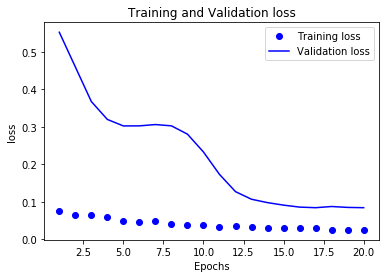

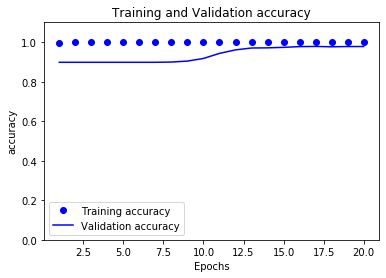

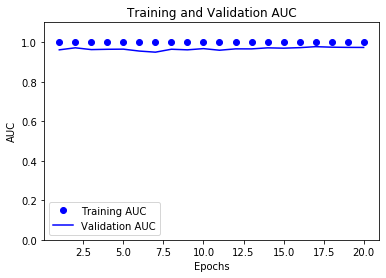

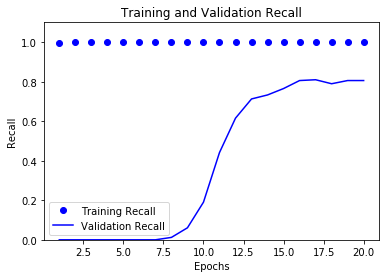

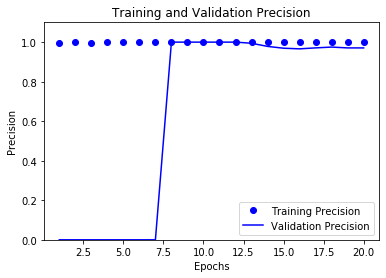

In [0]:
plot_progress(history_Xception1D.history)

## Wavenet

**NOTE**
- code adpated from Geron2019

In [0]:
from tensorflow.keras.layers import Add

class GatedActivationUnit(layers.Layer):
  def __init__(self, activation="tanh", **kwargs):
    super().__init__(**kwargs)
    self.activation = activations.get(activation)
  def call(self, inputs):
    n_filters = inputs.shape[-1] // 2
    linear_output = self.activation(inputs[..., :n_filters])
    gate = activations.sigmoid(inputs[..., n_filters:])
    return self.activation(linear_output) * gate

def wavenet_residual_block(inputs, n_filters, kernel_size, dilation_rate):
  x = Conv1D(2 * n_filters, kernel_size=kernel_size, padding="causal", 
             dilation_rate=dilation_rate)(inputs)

  
  x = GatedActivationUnit()(x)
  x = Conv1D(n_filters, kernel_size=1)(x)
  return Add()([x, inputs]), x

def create_Wavenet_model(input_shape, target_shape, filters=32, kernel=2,
                         n_layers_per_block=10, n_blocks=3, first_units = 100, 
                         dense_layers = 2, flatten=False):
  clear_session()

  # ------------
  # Input Layers
  # ------------
  inputs = Input(shape=input_shape)
  re = Reshape(target_shape)(inputs)

  # -----------
  # Conv Layers
  # -----------
  x = Conv1D(filters, kernel_size=kernel, padding="causal")(re)

  skip_to_last = []
  for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
      x, skip = wavenet_residual_block(x, filters, kernel, dilation_rate)
      skip_to_last.append(skip)

  x = activations.relu(Add()(skip_to_last))

  x = Conv1D(filters, kernel_size=1, activation="relu")(x)
  x = Conv1D(target_shape[0], kernel_size=1, activation="relu")(x)

  # ------------
  # Dense Layers
  # ------------
  if flatten:
    x = Flatten()(x)
  else:
    x = GlobalAveragePooling1D()(x)

  for layer_no in range(dense_layers):
    layer_no+=1
    x = Dense(units=int(first_units/layer_no))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(rate=0.5)(x)

  # ------------
  # Output Layer
  # ------------
  output = Dense(units=1, activation='sigmoid')(x)

  model = models.Model(inputs=[inputs], outputs=[output])
    
  model.compile(optimizer=Adam(0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])
  
  return model

In [0]:
Wavenet_model = create_Wavenet_model(reshape_input_filt, reshape_target_filt)
Wavenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 11264)]      0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 512, 22)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 512, 32)      1440        reshape[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 512, 64)      4160        conv1d[0][0]                     
______________________________________________________________________________________________

In [0]:
best_model_filepath = "Wavenet_Model.ckpt"
tensorboard_logs_filepath = "./Wavenet_logs/"

# Train
history_Wavenet = Wavenet_model.fit_generator(generator=generator_1D,
                                              epochs=EPOCHS,
                                              steps_per_epoch=steps_per_epoch_1D,
                                              validation_data = (X_val_filt_reshape, 
                                                                 y_val_filt),
                                              callbacks=create_callbacks(best_model_filepath, 
                                                                         tensorboard_logs_filepath),
                                               verbose=1)

  ...
    to  
  ['...']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train for 39 steps, validate on 2421 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


39/39 [==============================] - 12s 317ms/step - loss: 0.3444 - accuracy: 0.8699 - AUC: 0.9324 - Recall: 0.7834 - Precision: 0.9487 - val_loss: 1.0497 - val_accuracy: 0.1020 - val_AUC: 0.9756 - val_Recall: 1.0000 - val_Precision: 0.1020
Epoch 2/20
39/39 [==============================] - 3s 85ms/step - loss: 0.2410 - accuracy: 0.9214 - AUC: 0.9629 - Recall: 0.8816 - Precision: 0.9571 - val_loss: 1.0298 - val_accuracy: 0.1020 - val_AUC: 0.9738 - val_Recall: 1.0000 - val_Precision: 0.1020
Epoch 3/20
38/39 [============================>.] - ETA: 0s - loss: 0.1886 - accuracy: 0.9370 - AUC: 0.9790 - Recall: 0.9143 - Precision: 0.9577
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
39/39 [==============================] - 3s 82ms/step - loss: 0.1870 - accuracy: 0.9378 - AUC: 0.9795 - Recall: 0.9148 - Precision: 0.9588 - val_loss: 1.0553 - val_accuracy: 0.1020 - val_AUC: 0.9754 - val_Recall: 1.0000 - val_Precision: 0.1020
Epoch 4/20
39/39 [===========

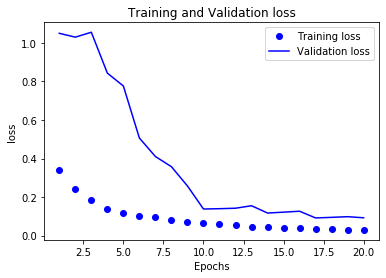

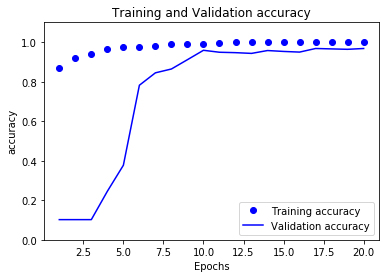

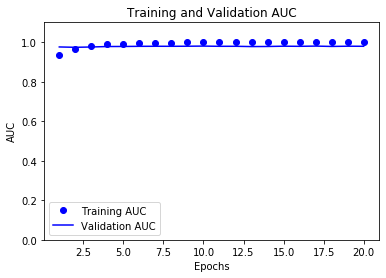

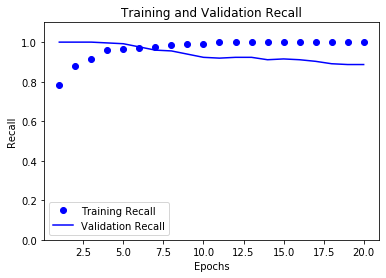

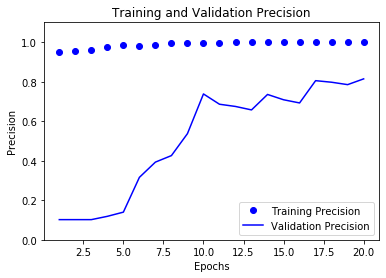

In [0]:
plot_progress(history_Wavenet.history)

Lets have a look at how their training compares

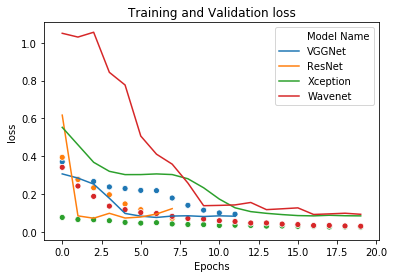

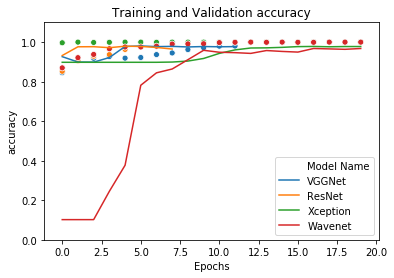

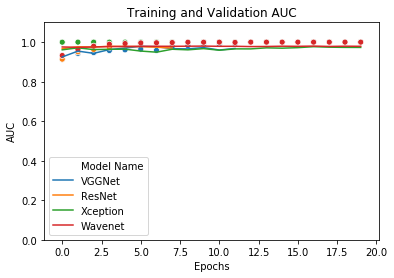

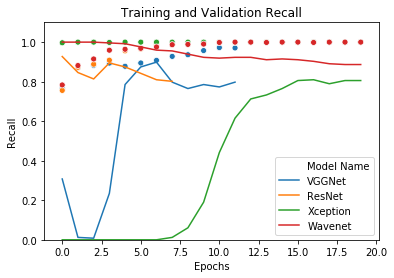

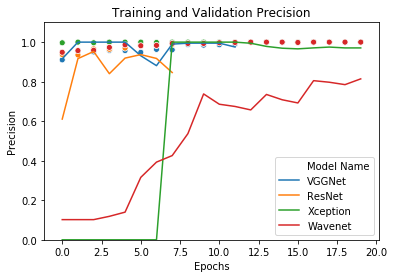

In [0]:
import seaborn as sns

def compare_progress(history_dicts):
  for key in list(history_dicts['VGGNet'].keys())[:5]:
    plt.clf() # Clears the figure
    for i, model_name in enumerate(history_dicts.keys()):

      history_dict = history_dicts[model_name]
      training_values = history_dict[key] 
      val_values = history_dict['val_'+key]

      model_scores_df = pd.DataFrame([training_values, val_values], index=['Training', 
                                                                           'Validation']).T
      model_scores_df['Model Name'] = model_name
      model_scores_df = model_scores_df.reset_index()
      
      if i == 0:
        scores_df = model_scores_df
      else:
        scores_df = pd.concat([scores_df, model_scores_df])

    most_epochs = scores_df['Model Name'].value_counts().max()

    sns.lineplot('index', 'Validation', hue = 'Model Name', data=scores_df)
    sns.scatterplot('index', 'Training', hue = 'Model Name', data=scores_df, legend=False)

    if key != 'loss':
      plt.ylim([0.,1.1])

    plt.title('Training and Validation '+key) 
    plt.xlabel('Epochs')
    plt.ylabel(key)
    #plt.legend()
    plt.show()
    
compare_progress({'VGGNet':history_VGGNet1D.history, 'ResNet':history_ResNet1D.history, 
                  'Xception':history_Xception1D.history, 'Wavenet':history_Wavenet.history})

**TODO**
- get test scores of their performance in a grid or visualise...

# Parameter Optimisation

We will again use HpBandSter

# Exercises

Below are a few suggested exercises that may help improve your skills.

You may want to backup this Notebook before making any changes.

1. Test a 2D CNN design on the filtered data. You will need to reshape the data by adding an extra dimension such as:

  ``np.reshape(data, (data.shape[0], -1))``
2. For the 2D models, explore whether having levels last or channels last is better for model training

3. Explore whether having ballanced batches or class weights is generally better for the different model designs.

4. Test whether CNN models generally are better with the UDWT data (2D CNN) or filt data (1D CNN). 


**TODO**
- order in terms of difficulty

# License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.